In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from sklearn.metrics import mean_squared_error

In [145]:
df=pd.read_excel("C:\\Users\\HP\\Downloads\\Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [147]:
df.describe()


,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [148]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [149]:
df.shape

(96, 2)

In [150]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [151]:
df[df.duplicated()]

,Month,Passengers


<AxesSubplot:>

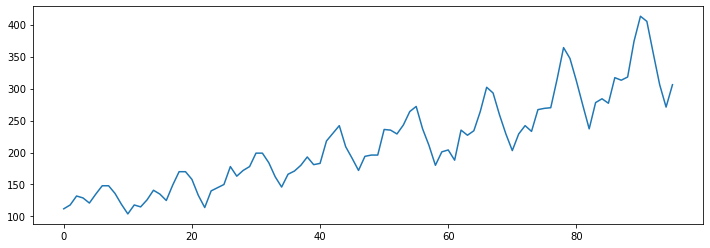

In [152]:
df.Passengers.plot(figsize=(12,4))

In [153]:
len(df.Passengers)

96

Line plot

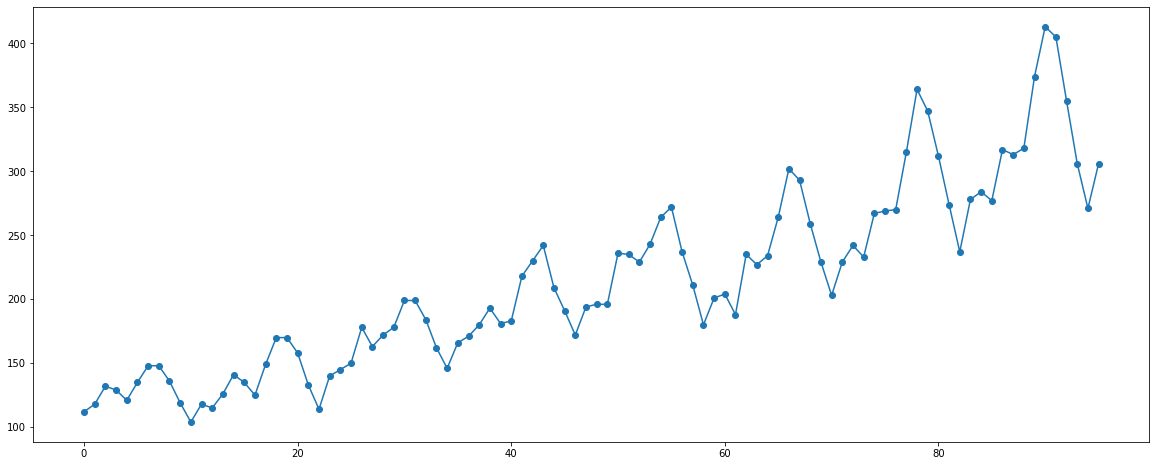

In [154]:
df['Passengers'].plot(figsize=(20, 8),marker='o')
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

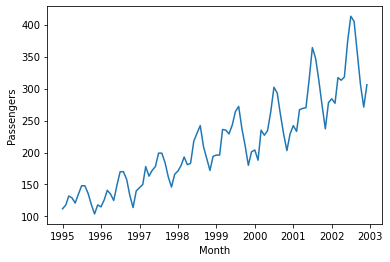

In [155]:
sns.lineplot(x = 'Month', y = 'Passengers', data = df)

The line is gradually increasing for every year.
So ,the data has increasing trend

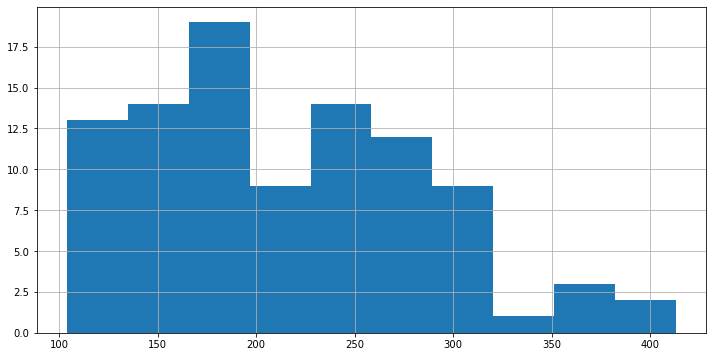

In [156]:
df.Passengers.hist(figsize=(12,6))
plt.show()

Splitting data

In [157]:
Train = df.head(84)
Test = df.tail(12)
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


Moving Average

In [158]:
list(range(2,24,6))

[2, 8, 14, 20]

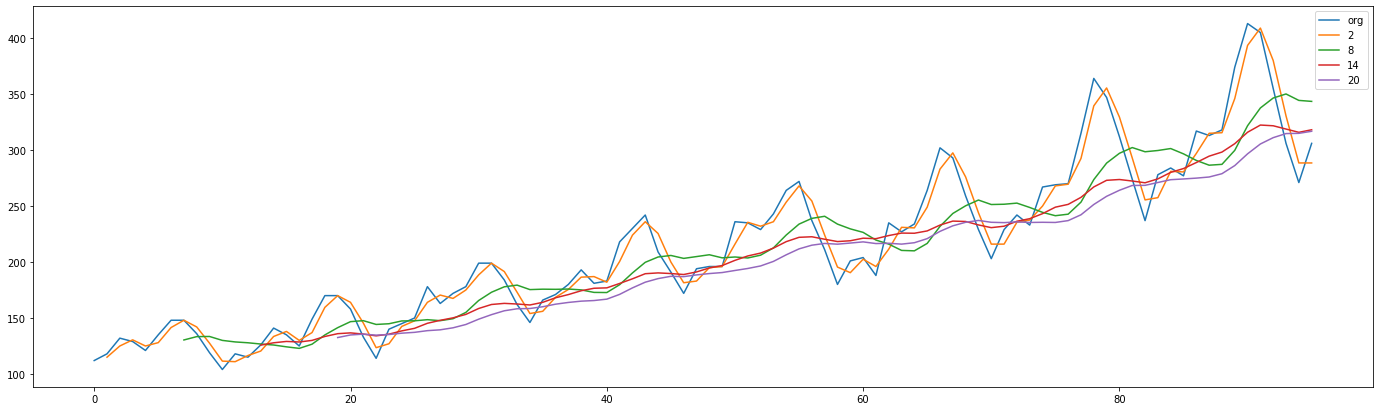

In [159]:
plt.figure(figsize=(24,7))
df.Passengers.plot(label="org")
for i in range(2,24,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time series decomposition plot

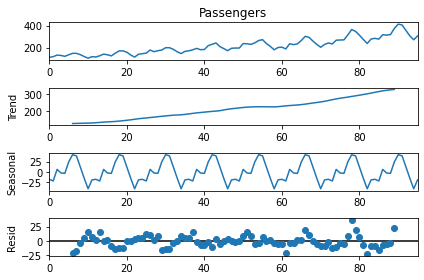

In [160]:
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

The data having Trend and seasonal pattern

ACF plots and PACF plots

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


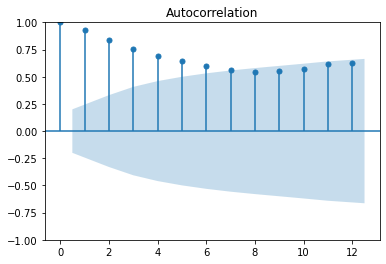

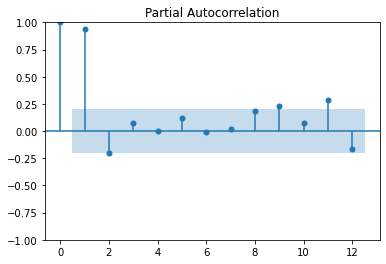

In [161]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show()

Evaluation Metric MAPE

In [162]:
#Mean Absolute Percentage Error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [163]:
df1=pd.DataFrame()
df1['Passengers']=df["Passengers"]
weights = np.array([0.1, 0.2, 0.3, 0.4])
df1['WMA'] = df1['Passengers'].rolling(4).apply(lambda x: np.sum(weights*x))
df1

,Passengers,WMA
0,112,NaN
1,118,NaN
2,132,NaN
3,129,126.0
4,121,125.3
...,...,...
91,405,392.5
92,355,383.5
93,306,351.2
94,271,311.7


In [343]:
df.set_index('Month',inplace=True)
df.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [344]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [345]:
Train = df.head(72)
Test = df.tail(24)
Train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2000-08-01,293
2000-09-01,259
2000-10-01,229


In [179]:
Test.shape

(24, 2)

In [346]:
print('Train:',Train.index.min(),Train.index.max(),'\n',
'Test:',Test.index.min(),Test.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


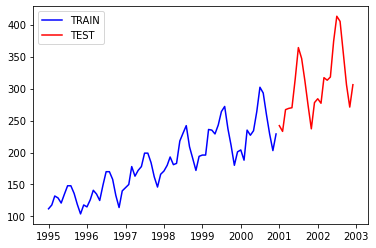

In [347]:
plt.figsize=(12,6)
plt.plot(Train,label='TRAIN',color='blue')
plt.plot(Test,label='TEST',color='red')
plt.legend()
plt.show()

# Simple Exponential Method

In [189]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
mape_ses=MAPE(pred_ses,Test.Passengers) 
mape_ses

20.5918790586154

In [221]:
MSE = np.square(np.subtract(Test['Passengers'],pred_ses)).mean()  
print("Mean Absolute Percent Error :",mape_ses) 
ses_rsme = math.sqrt(MSE)  
print("Test Root Mean Square Error:",ses_rsme)  

Mean Absolute Percent Error : 20.5918790586154
Test Root Mean Square Error: 83.65334103034576


# Holt method

In [193]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.9)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
mape_hw=MAPE(pred_hw,Test.Passengers) 
mape_hw

C:\Users\HP\AppData\Local\Temp\ipykernel_22460\3593634252.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.9)


12.320418363209122

In [222]:
MSE = np.square(np.subtract(Test['Passengers'],pred_hw)).mean()  
print("Mean Absolute Percent Error :",mape_hw) 
hw_rsme = math.sqrt(MSE)  
print("Test Root Mean Square Error:",hw_rsme)  

Mean Absolute Percent Error : 12.320418363209122
Test Root Mean Square Error: 43.13230270267137


# Holts winter exponential smoothing with additive seasonality and additive trend

In [196]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_add_add =MAPE(pred_hwe_add_add,Test.Passengers) 
mape_hwe_add_add

12.084990921893926

In [218]:
MSE = np.square(np.subtract(Test['Passengers'],pred_hwe_add_add)).mean()  
print("Mean Absolute Percent Error :",mape_hwe_add_add) 
aa_rsme = math.sqrt(MSE)  
print("Test Root Mean Square Error:",aa_rsme)  

Mean Absolute Percent Error : 12.084990921893926
Test Root Mean Square Error: 47.57079569932804


# Holts winter exponential smoothing with multiplicative seasonality and additive trend¶

In [205]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_mul_add=MAPE(pred_hwe_mul_add,Test.Passengers)
mape_hwe_mul_add

9.368335182173569

In [217]:
MSE = np.square(np.subtract(Test['Passengers'],pred_hwe_mul_add)).mean()  
print("Mean Absolute Percent Error :",mape_hwe_mul_add) 
ma_rsme = math.sqrt(MSE)  
print("Test Root Mean Square Error:",ma_rsme)  

Mean Absolute Percent Error : 9.368335182173569
Test Root Mean Square Error: 46.51851050946484


# Holts winter exponential smoothing with additive seasonality and multiplicative trend¶

In [213]:
hwe_model_add_mul = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="mul",
                                         seasonal_periods=12).fit() 
pred_hwe_add_mul = hwe_model_add_mul.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_add_mul=MAPE(pred_hwe_add_mul,Test.Passengers)
mape_hwe_add_mul

11.756671893671141

In [216]:
MSE = np.square(np.subtract(Test['Passengers'],pred_hwe_add_mul)).mean()  
print("Mean Absolute Percent Error :",mape_hwe_add_mul) 
am_rsme = math.sqrt(MSE)  
print("Test Root Mean Square Error:",am_rsme)  

Mean Absolute Percent Error : 11.756671893671141
Test Root Mean Square Error: 46.51851050946484


# Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

In [208]:
hwe_model_mul_mul = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="mul",
                                         seasonal_periods=12).fit() 
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_mul_mul=MAPE(pred_hwe_mul_mul,Test.Passengers)
mape_hwe_mul_mul

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


6.03504677750598

In [220]:
MSE = np.square(np.subtract(Test['Passengers'],pred_hwe_mul_mul)).mean()  
print("Mean Absolute Percent Error :",mape_hwe_mul_mul) 
mm_rsme = math.sqrt(MSE)  
print("Test Root Mean Square Error:",mm_rsme)  

Mean Absolute Percent Error : 6.03504677750598
Test Root Mean Square Error: 23.058733311909588


# Comparing the results 

In [224]:
Evaluation = {"Models":pd.Series(["Simple Exponential Method","Holt method","HoltWinter_Exp_ad_ad","HoltWinter_Exp_mul_ad","HoltWinter_Exp_ad_mul"\
                                  ,"HoltWinter_Exp_mul_mul"]),\
        "Test_MAPE(%)":pd.Series([mape_ses,mape_hw,mape_hwe_add_add,mape_hwe_mul_add,mape_hwe_add_mul,mape_hwe_mul_mul]),\
        "Test_RMSE_Values":pd.Series([ses_rsme,hw_rsme,aa_rsme,ma_rsme,am_rsme,mm_rsme])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation


,Models,Test_MAPE(%),Test_RMSE_Values
0,HoltWinter_Exp_mul_mul,6.035047,23.058733
1,HoltWinter_Exp_mul_ad,9.368335,46.518511
2,HoltWinter_Exp_ad_mul,11.756672,46.518511
3,HoltWinter_Exp_ad_ad,12.084991,47.570796
4,Holt method,12.320418,43.132303
5,Simple Exponential Method,20.591879,83.653341


# Visualizing Model

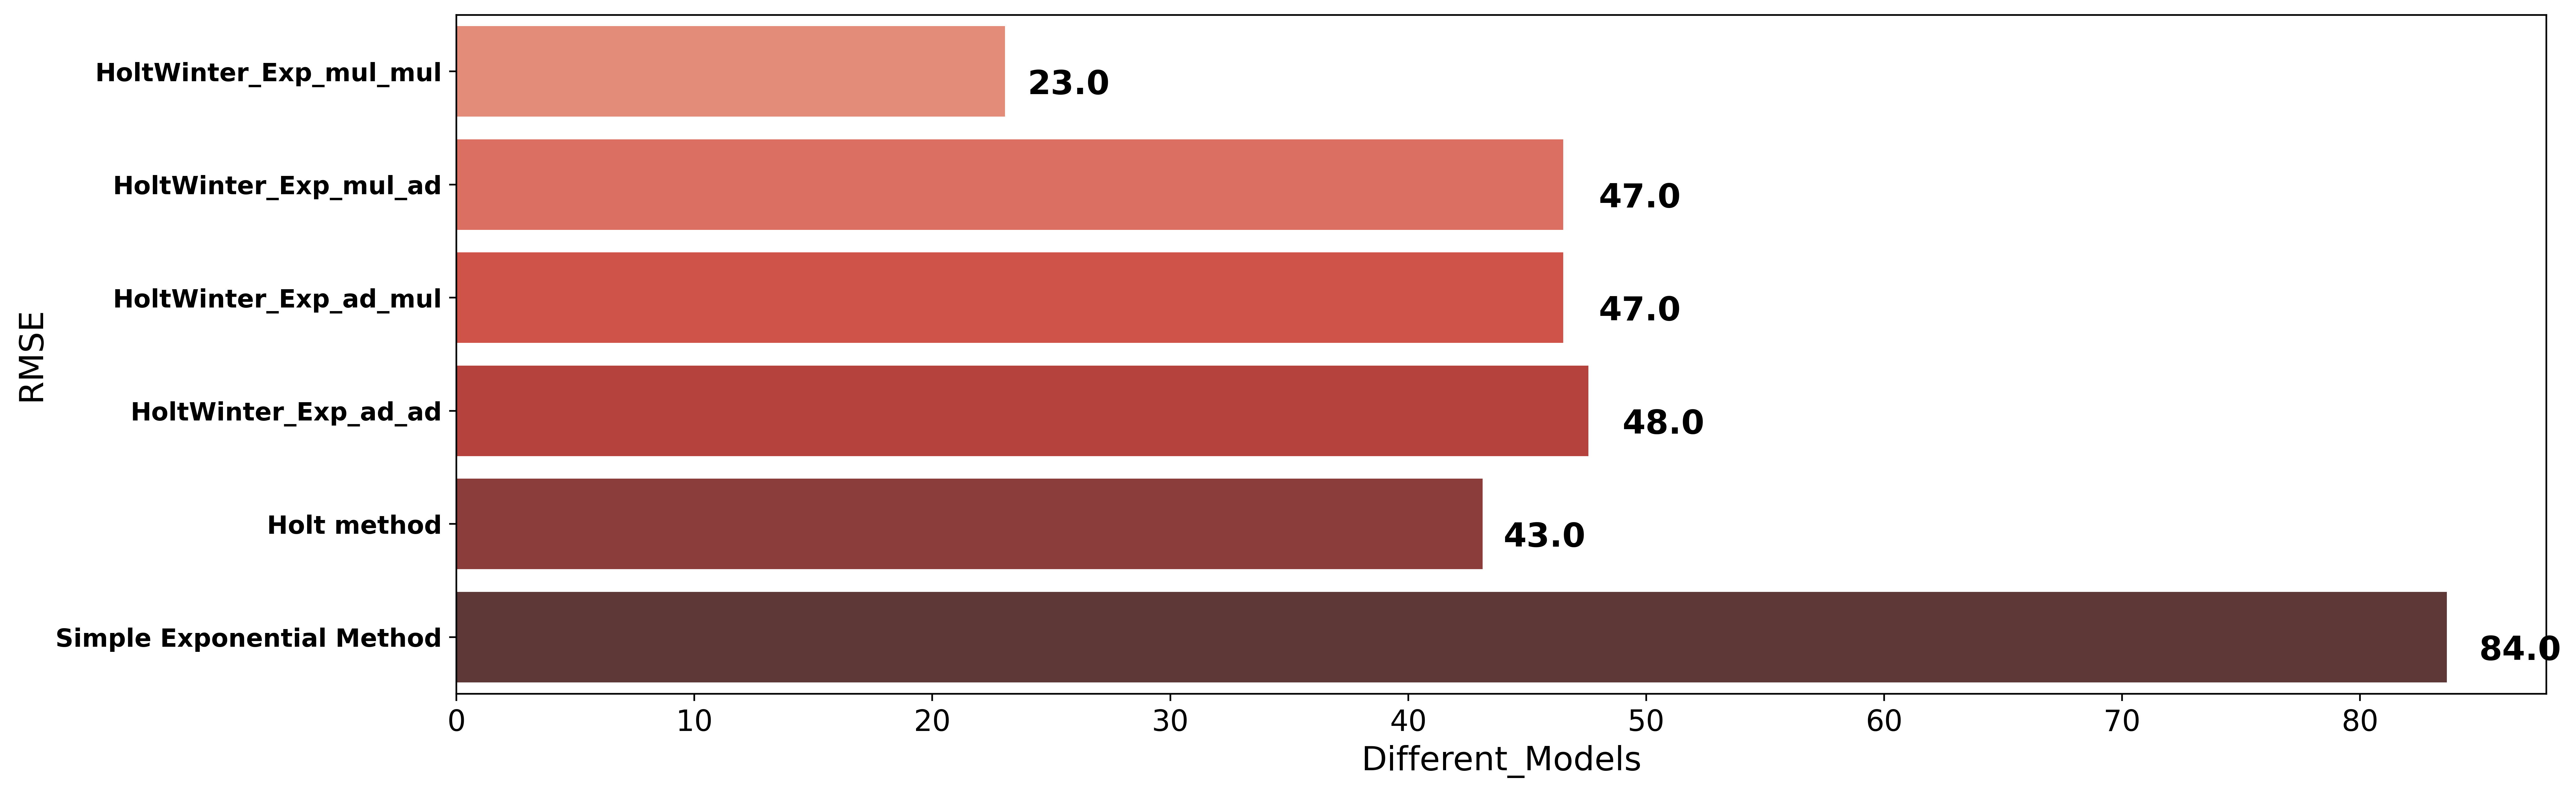

In [226]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=500)
sns.barplot(x='Test_RMSE_Values', y='Models', data=table_evaluation, palette='Reds_d',  ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 1, i + .20, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend is having least Root Mean Squared Error.

# Final Model by combining train and test

In [173]:
hwe_model_mul_mul= ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="mul",
                                         seasonal_periods=12).fit() 

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [228]:
final_pred=hwe_model_mul_mul.forecast(10)
final_pred

72    233.064640
73    234.636500
74    274.649519
75    264.204622
76    263.842410
77    293.360716
78    324.746514
79    327.241195
80    290.984003
81    257.687044
dtype: float64

In [242]:
pred_df = pd.DataFrame()
pred_df['Month'] = df['Month'][72:82]
pred_df['Actual'] = df['Passengers'][72:82]
pred_df['Predicted'] = final_pred
pred_df['% Error'] = abs( df['Passengers'][72:82] - final_pred)/ df['Passengers'][72:82]*100
pred_df

,Month,Actual,Predicted,% Error
72,2001-01-01,242,233.064640,3.692297
73,2001-02-01,233,234.636500,0.702360
74,2001-03-01,267,274.649519,2.864988
75,2001-04-01,269,264.204622,1.782668
76,2001-05-01,270,263.842410,2.280589
77,2001-06-01,315,293.360716,6.869614
78,2001-07-01,364,324.746514,10.783925
79,2001-08-01,347,327.241195,5.694180
80,2001-09-01,312,290.984003,6.735897
81,2001-10-01,274,257.687044,5.953634


# Creating Dummy Variables of the Categorical Feature 

In [293]:
data = df.copy()
data.reset_index(inplace=True)
data['t'] = np.arange(1,len(data)+1)
data['t_squared'] = np.square(data.t)
data['Date'] = pd.to_datetime(data['Month'], format="%b-%y")
data['month'] = data['Date'].dt.strftime('%b')
data['year'] = data['Date'].dt.strftime('%Y')
months = pd.get_dummies(data['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
data = pd.concat([data,months],axis=1)
data['log_passengers'] = np.log(data['Passengers'])
data

,index,Month,Passengers,t,t_squared,Date,month,year,Jan,Feb,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,0,1995-01-01,112,1,1,1995-01-01,Jan,1995,1,0,...,0,0,0,0,0,0,0,0,0,4.718499
1,1,1995-02-01,118,2,4,1995-02-01,Feb,1995,0,1,...,0,0,0,0,0,0,0,0,0,4.770685
2,2,1995-03-01,132,3,9,1995-03-01,Mar,1995,0,0,...,0,0,0,0,0,0,0,0,0,4.882802
3,3,1995-04-01,129,4,16,1995-04-01,Apr,1995,0,0,...,1,0,0,0,0,0,0,0,0,4.859812
4,4,1995-05-01,121,5,25,1995-05-01,May,1995,0,0,...,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,2002-08-01,405,92,8464,2002-08-01,Aug,2002,0,0,...,0,0,0,0,1,0,0,0,0,6.003887
92,92,2002-09-01,355,93,8649,2002-09-01,Sep,2002,0,0,...,0,0,0,0,0,1,0,0,0,5.872118
93,93,2002-10-01,306,94,8836,2002-10-01,Oct,2002,0,0,...,0,0,0,0,0,0,1,0,0,5.723585
94,94,2002-11-01,271,95,9025,2002-11-01,Nov,2002,0,0,...,0,0,0,0,0,0,0,1,0,5.602119


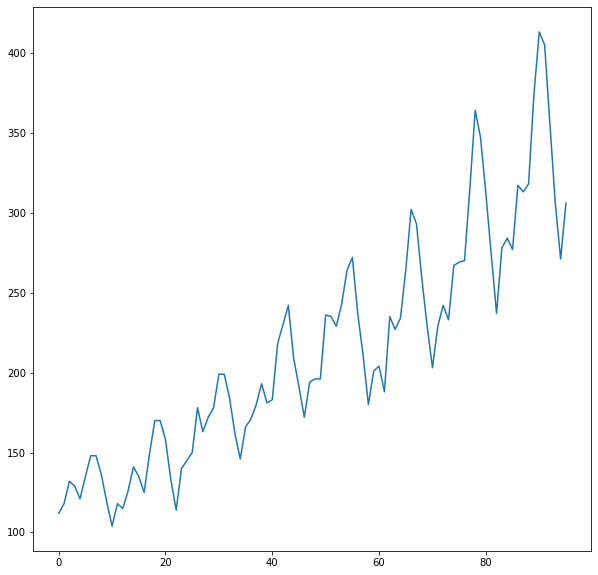

In [294]:
plt.figure(figsize = (10,10))
plt.plot(data['Passengers'])
plt.show()

In [307]:
data_1.shape

(96, 19)

# Splitting data into Train and Test

In [310]:
train_data = data.iloc[:size]
test_data = data.iloc[size:]

In [311]:
train_data.shape

(72, 19)

In [312]:
test_data.shape

(24, 19)

# Linear Model

In [313]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_linear))**2))
rmse_linear

51.667792995646224

# Exponential

In [314]:
Exp = smf.ols('log_passengers~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.552328946004636

# Quadratic 

In [316]:
Quad = smf.ols('Passengers~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

51.99073640155396

# Additive seasonality 

In [319]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

127.26451565320343

# Additive Seasonality Quadratic 

In [320]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.241608485937356

# Multiplicative Seasonality

In [321]:
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea


132.18762800263443

# Multiplicative Additive Seasonality 

In [322]:
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.714670246780543

# Compare the results 

In [336]:
data = {"Models":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"Test_RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['Test_RMSE_Values'], inplace=True, ignore_index=True)
table_rmse

,Models,Test_RMSE_Values
0,rmse_Mult_add_sea,11.714670
1,rmse_add_sea_quad,35.241608
2,rmse_Exp,42.552329
3,rmse_linear,51.667793
4,rmse_Quad,51.990736
5,rmse_add_sea,127.264516
6,rmse_Mult_sea,132.187628


In [337]:
e = table_rmse.append(table_evaluation)
e.drop('Test_MAPE(%)', axis=1, inplace=True)
e.sort_values(['Test_RMSE_Values'], inplace=True, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_22460\1684274008.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e = table_rmse.append(table_evaluation)


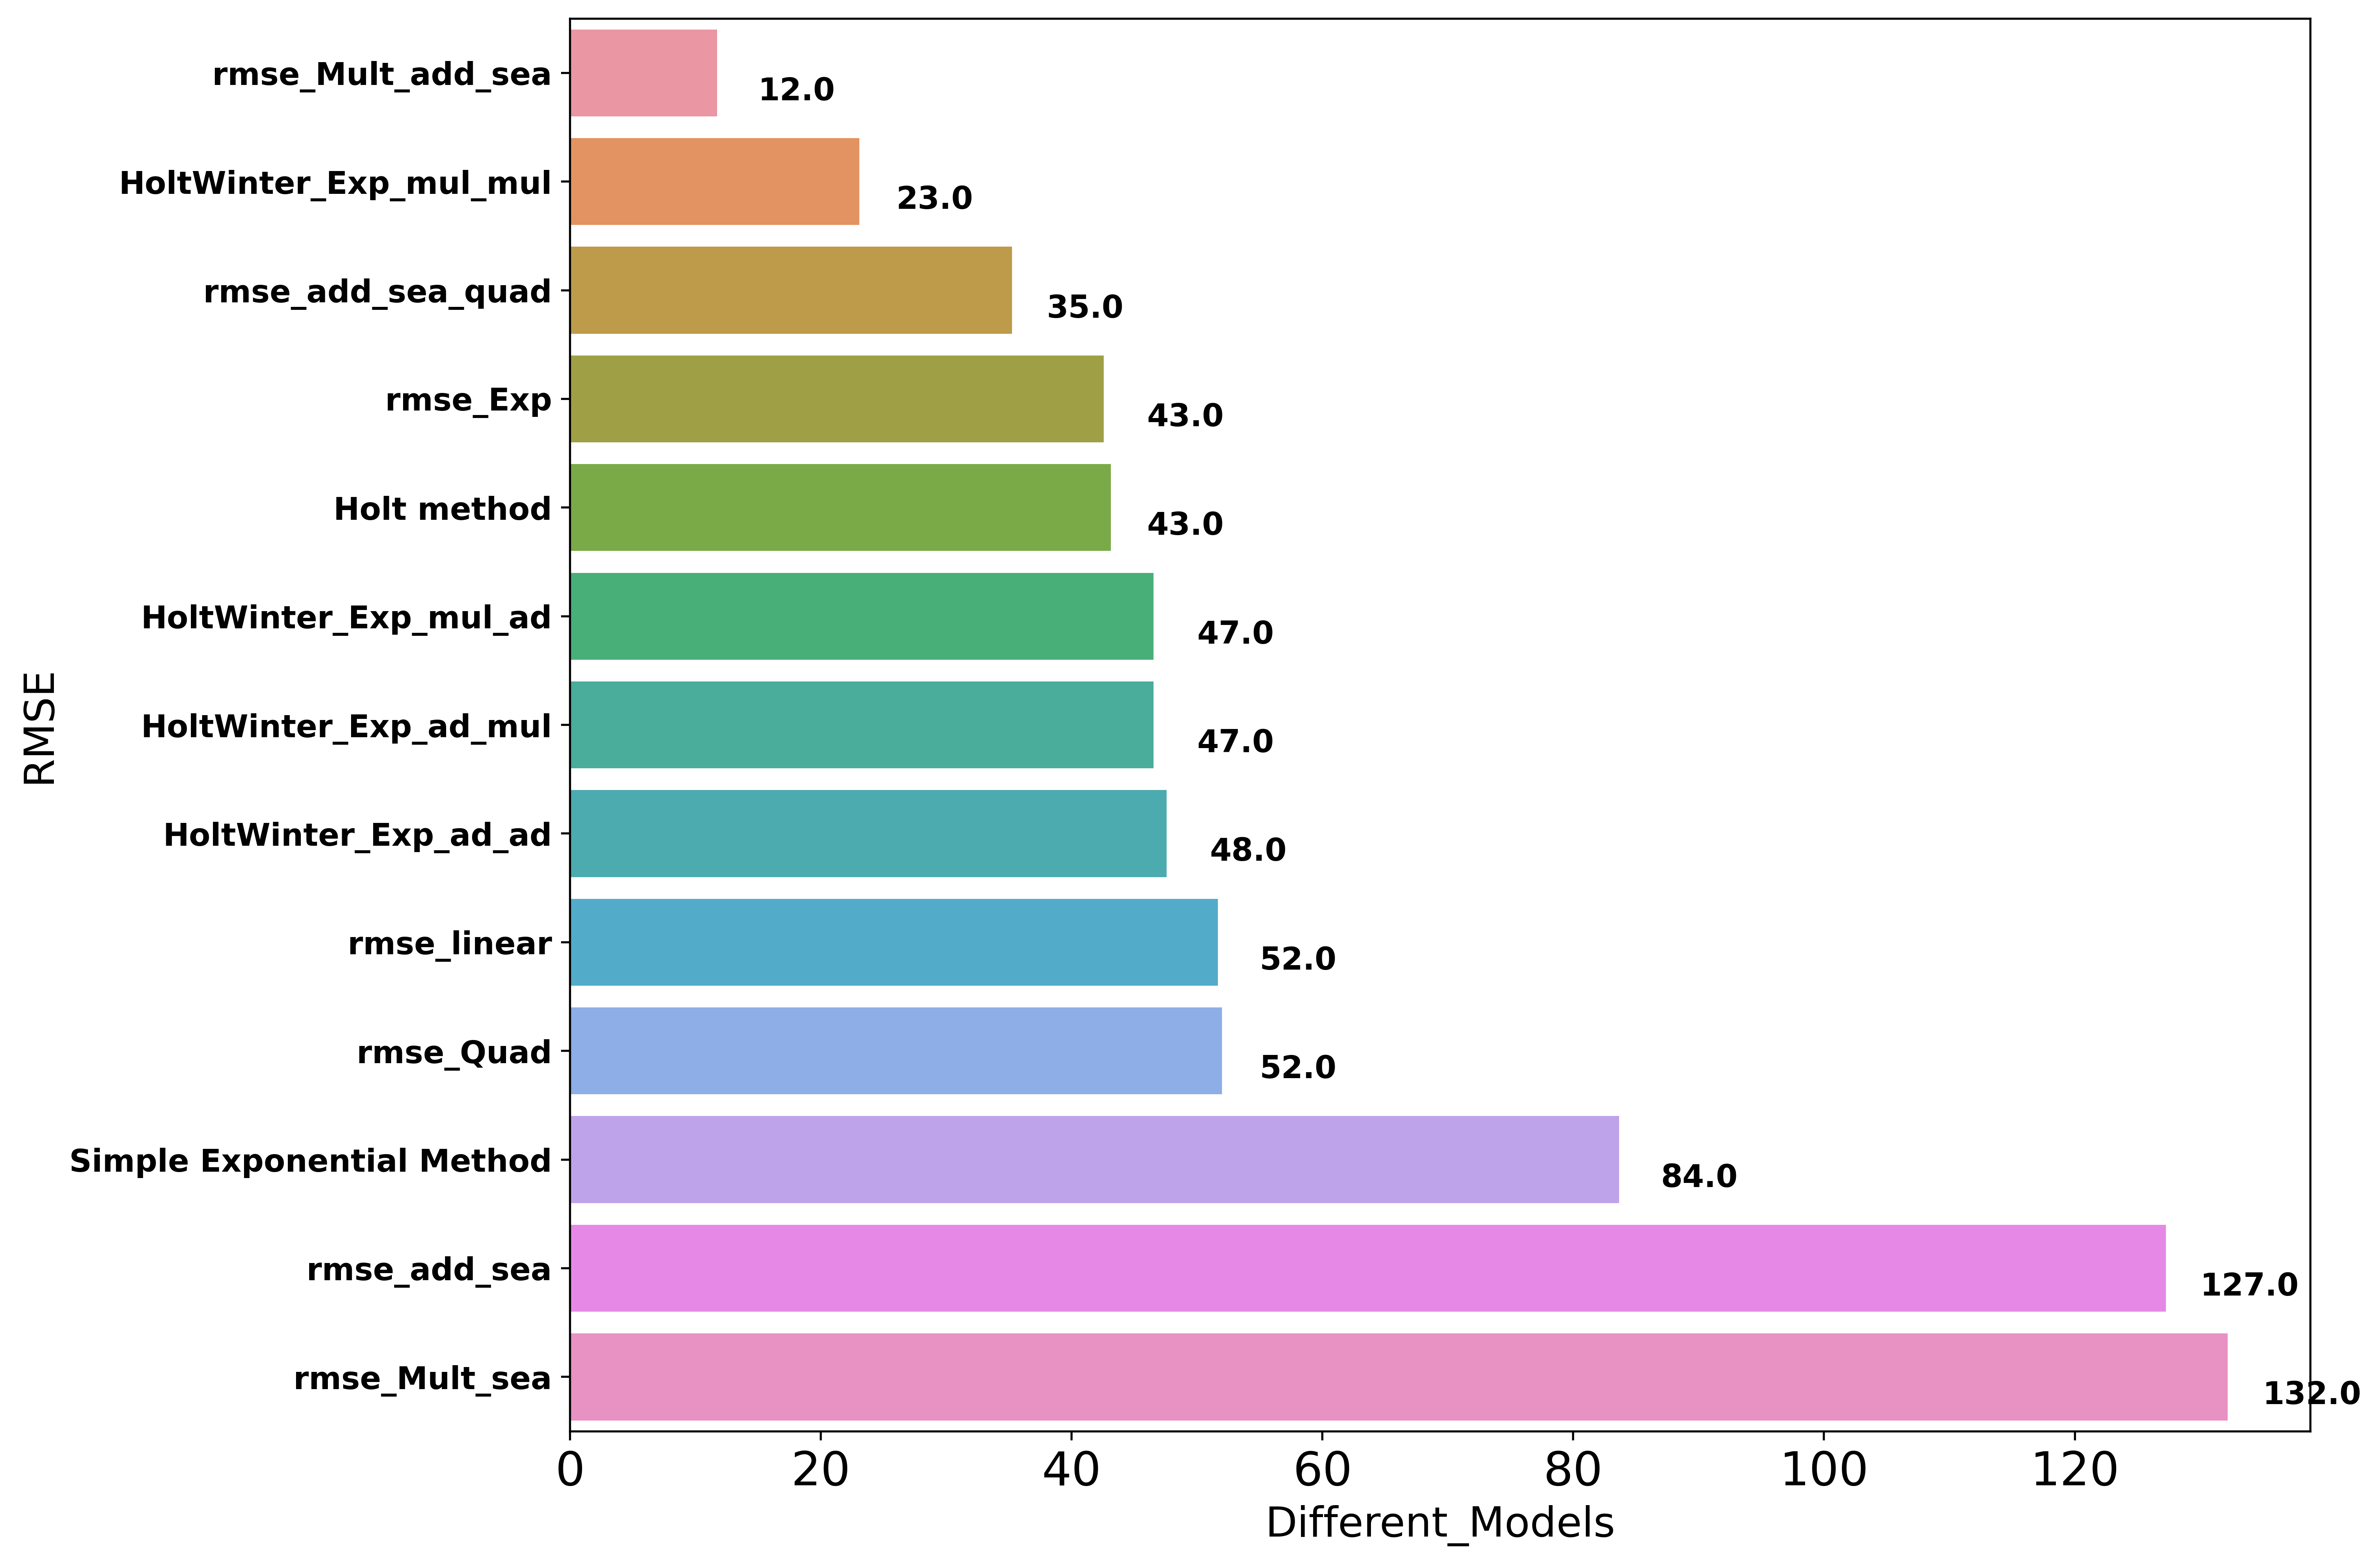

In [340]:
f, axe = plt.subplots(1,1, figsize=(12,10), dpi=500)
sns.barplot(x='Test_RMSE_Values', y='Models', data=e, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(e.Test_RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()


rmse_Mult_add_sea-The best model for forecasting is with the lowest RMSE.